### Import data

In [3]:
#import simple_imputed_df.csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

simple_imputed_df = pd.read_csv('simple_imputed_df.csv')
print(simple_imputed_df.head())

        id   host_id  host_response_time  host_response_rate  \
0  1489424   5294164                 1.0               100.0   
1  2992450   4621559                 3.0               100.0   
2  3820211  19648678                 1.0               100.0   
3  5651579  29288920                 1.0               100.0   
4  6623339  19648678                 1.0               100.0   

   host_acceptance_rate  host_is_superhost  host_identity_verified  \
0                  87.0                  0                       1   
1                 100.0                  0                       0   
2                  66.0                  0                       1   
3                  99.0                  0                       1   
4                  66.0                  0                       1   

  neighbourhood_cleansed  latitude  longitude  ... number_of_reviews  \
0        FOURTEENTH WARD  42.66719  -73.81580  ...               248   
1             THIRD WARD  42.65789  -73.75370  ...

In [9]:
#list the column names one line each
print(simple_imputed_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253798 entries, 0 to 253797
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              253798 non-null  int64  
 1   host_id                         253798 non-null  int64  
 2   host_response_time              253798 non-null  float64
 3   host_response_rate              253798 non-null  float64
 4   host_acceptance_rate            253798 non-null  float64
 5   host_is_superhost               253798 non-null  int64  
 6   host_identity_verified          253798 non-null  int64  
 7   neighbourhood_cleansed          253798 non-null  object 
 8   latitude                        253798 non-null  float64
 9   longitude                       253798 non-null  float64
 10  room_type                       253798 non-null  object 
 11  accommodates                    253798 non-null  int64  
 12  beds            

1. Price distribution
2. Review score distribution
3. How common is host identity verification, and does it impact guest trust as reflected in booking rates or reviews?
4. Plot the locations of listings on a map to visualize geographic distribution and density.
5. Compare neighborhoods in terms of price, rating, and number of listings.
6. Compare room types in terms of price, rating, and number of listing.
7. Relation between number of amenities and price.
8. A metric of plots that compare super host and regular host in terms of price, review score
9. How does managing multiple listings affect the review scores
10. Does host_response_rate, host_response_time, and host_acceptance_rate have an impact on the price and ratings?
11. How can host verification affect other variables?
12. What are the best neighborhoods for a stay in each city.
13. What are the top listings in each city.
14. Who is the best host in each city?
15. Top listing and host in each neighbourhood.
16. Can neighbourhood impact price significantly?
17. How can location affect the price?
18. Impact of amenities on the price and ratings of the listing.



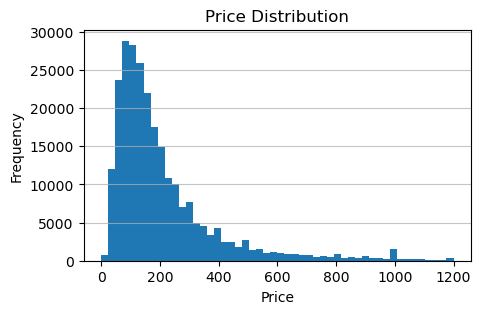

In [2]:
"""
1. Price distribution
"""

plt.figure(figsize=(5,3))
plt.hist(simple_imputed_df['price'], bins=50)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [3]:
"""
3. How common is host identity verification, and does it impact guest trust as reflected in booking rates or reviews?
"""
# 1. Ratio of varified host 
verification_ratio = simple_imputed_df['host_identity_verified'].astype(int).mean()
print('verification_ratio:', verification_ratio)

# 3. Average rating of varified and unverified host
average_score_verified = simple_imputed_df[simple_imputed_df['host_identity_verified'] == 1]['review_scores_rating'].mean()
average_score_unverified = simple_imputed_df[simple_imputed_df['host_identity_verified'] == 0]['review_scores_rating'].mean()
print(f'average_score_verified: {average_score_verified}, average_score_unverified: {average_score_unverified}')

# 4. Average number of review received by variafied and unvarified host
average_reviews_verified = simple_imputed_df[simple_imputed_df['host_identity_verified'] == 1]['number_of_reviews'].mean()
average_reviews_unverified = simple_imputed_df[simple_imputed_df['host_identity_verified'] == 0]['number_of_reviews'].mean()
print(f'average_reviews_verified: {average_reviews_verified}, average_reviews_unverified: {average_reviews_unverified}')

# 5. Average price for varified and unvarified host
average_price_verified = simple_imputed_df[simple_imputed_df['host_identity_verified'] == 1]['price'].mean()
average_price_unverified = simple_imputed_df[simple_imputed_df['host_identity_verified'] == 0]['price'].mean()
print(f'average_price_verified: {average_price_verified}, review_count_unverified: {average_price_unverified}')


verification_ratio: 0.8870282665742046
average_score_verified: 4.767520757818413, average_score_unverified: 4.778515775434613
average_reviews_verified: 44.9210930767659, average_reviews_unverified: 43.017578125
average_price_verified: 209.67797144710073, review_count_unverified: 209.68174525669642


d:\Software\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


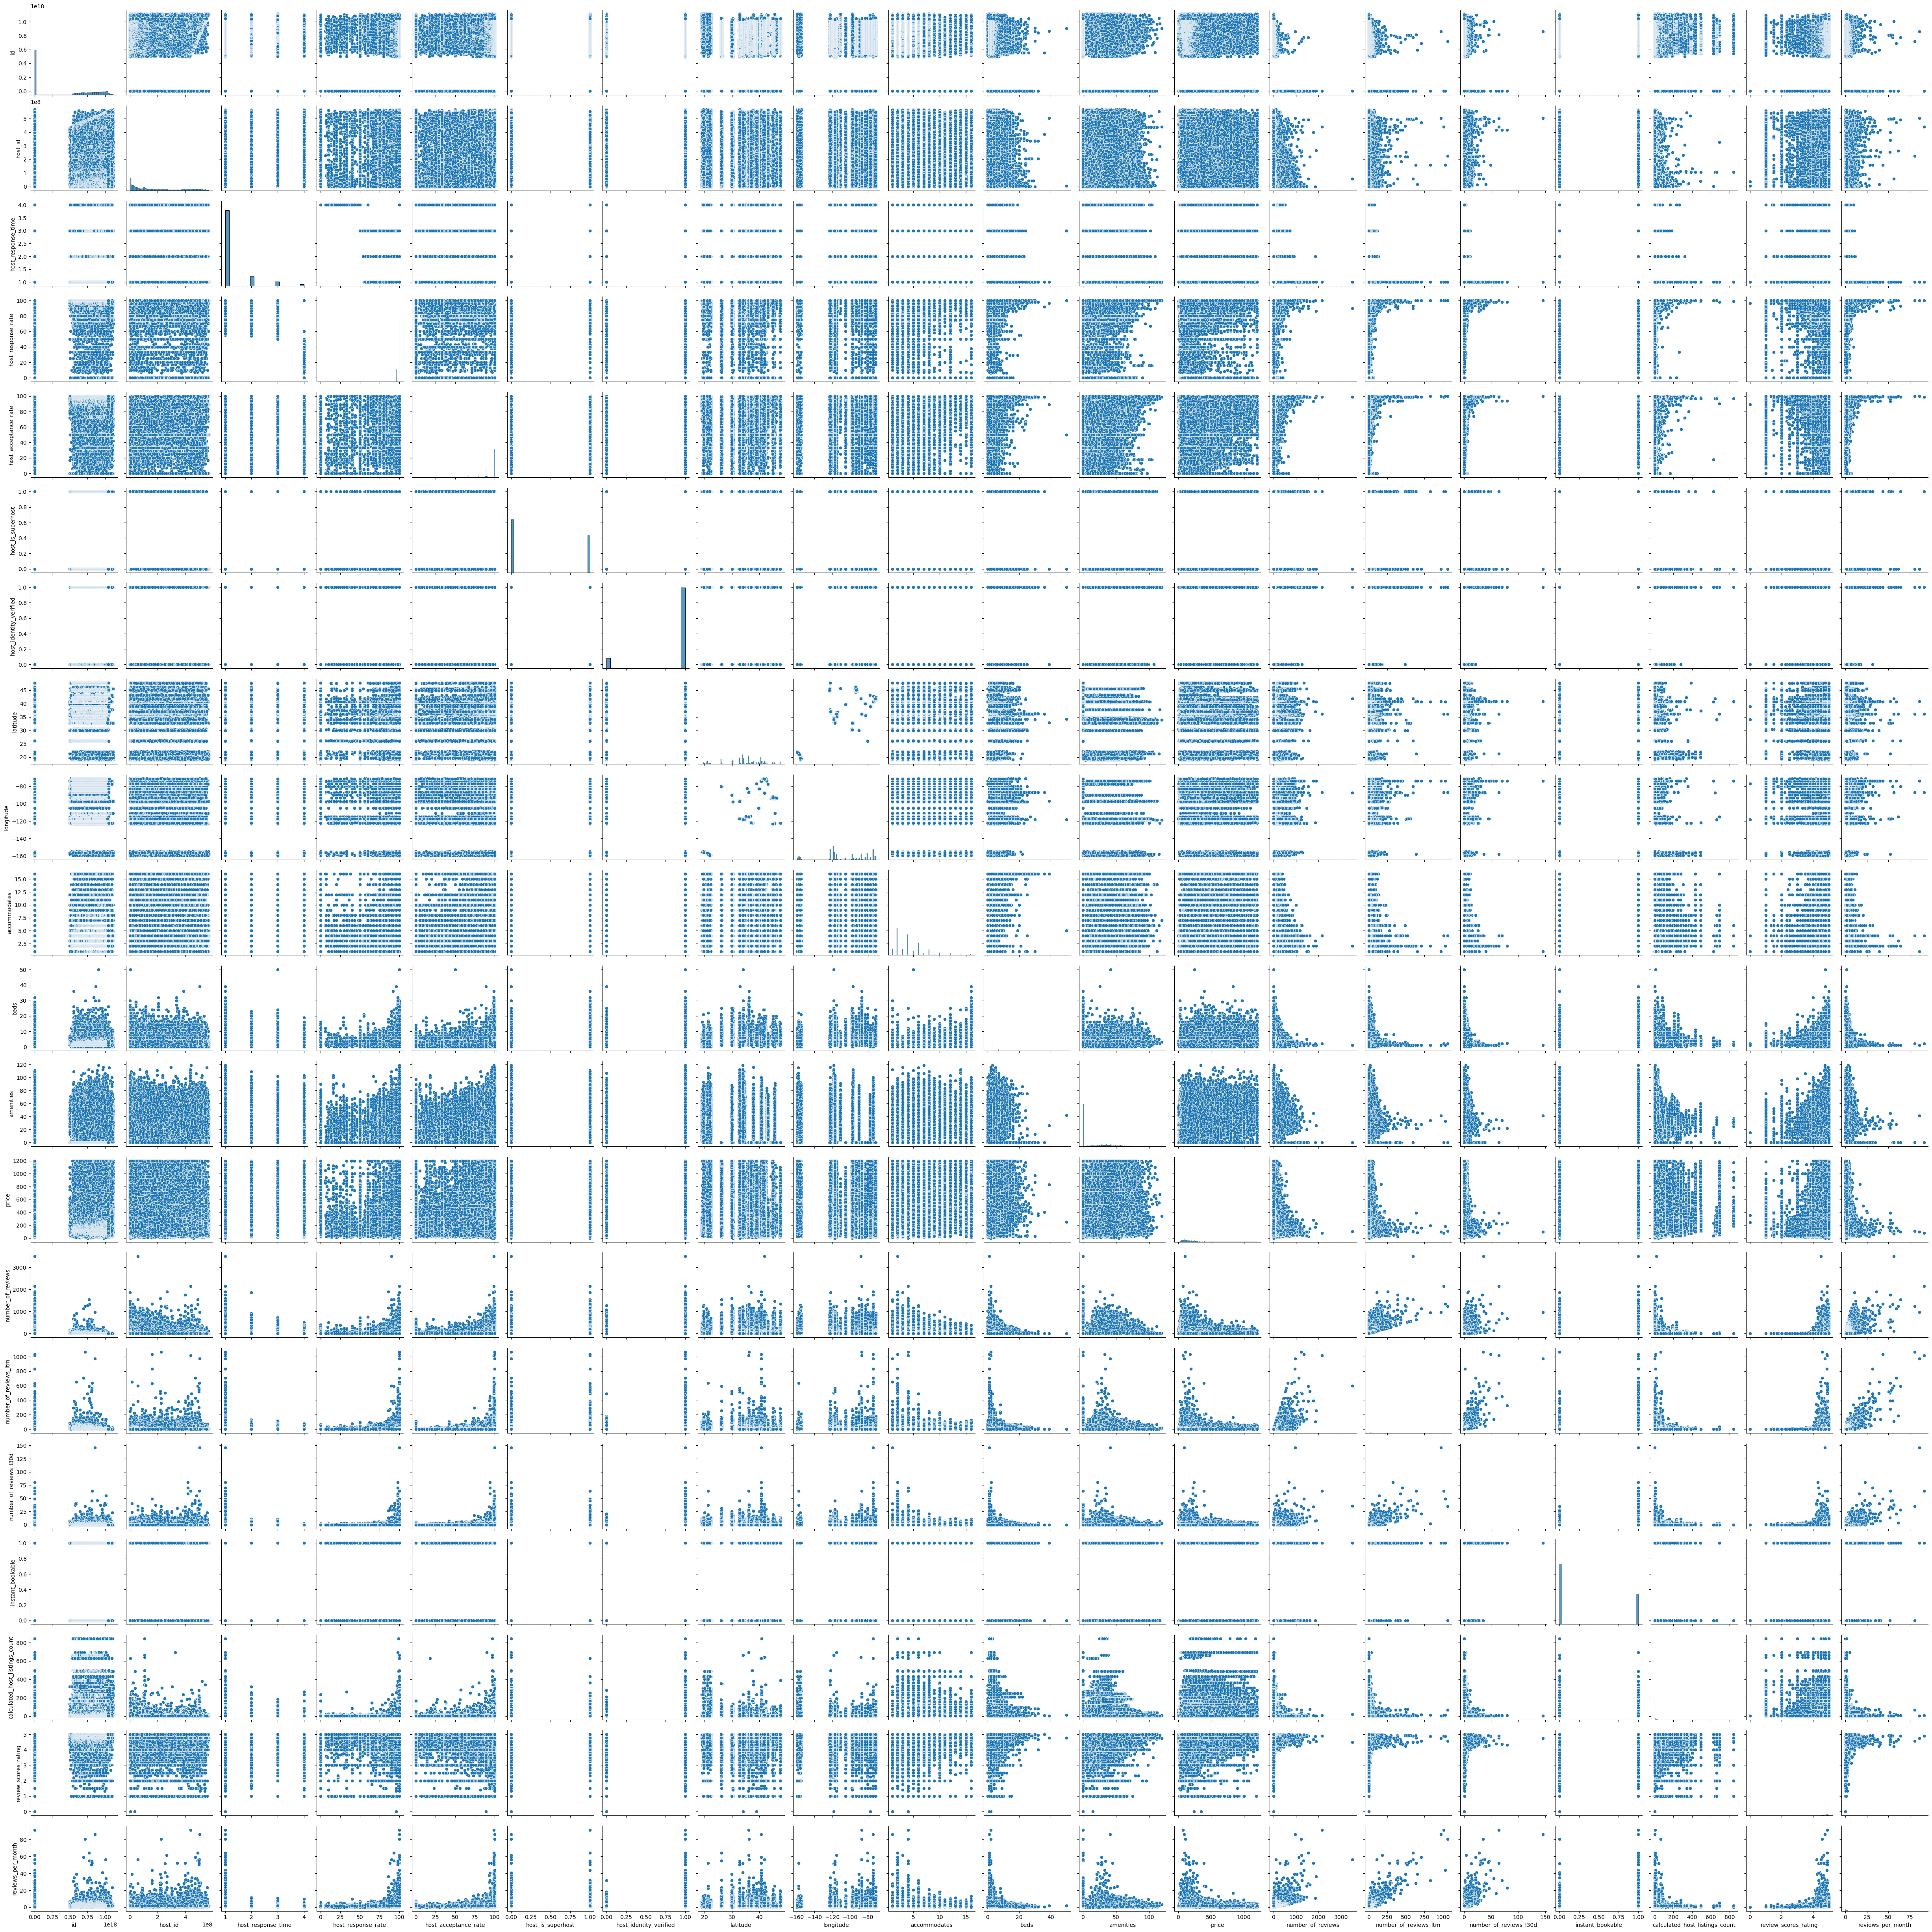

In [8]:
#Compare price with all other variables, make a matrix of plot for the plots
sns.pairplot(simple_imputed_df)
plt.show()


In [4]:
numerical = ['host_response_rate', 'host_acceptance_rate', 'beds', 'amenities', 'number_of_reviews', 
             'number_of_reviews_ltm', 'number_of_reviews_l30d', 'calculated_host_listings_count', 'review_scores_rating', 'reviews_per_month']
categorical = ['host_response_time', 'host_is_superhost', 'host_identity_verified', 'instant_bookable', 'room_type', 'property_type',
               'neighbourhood_cleansed', 'City', 'State', 'accommodates']


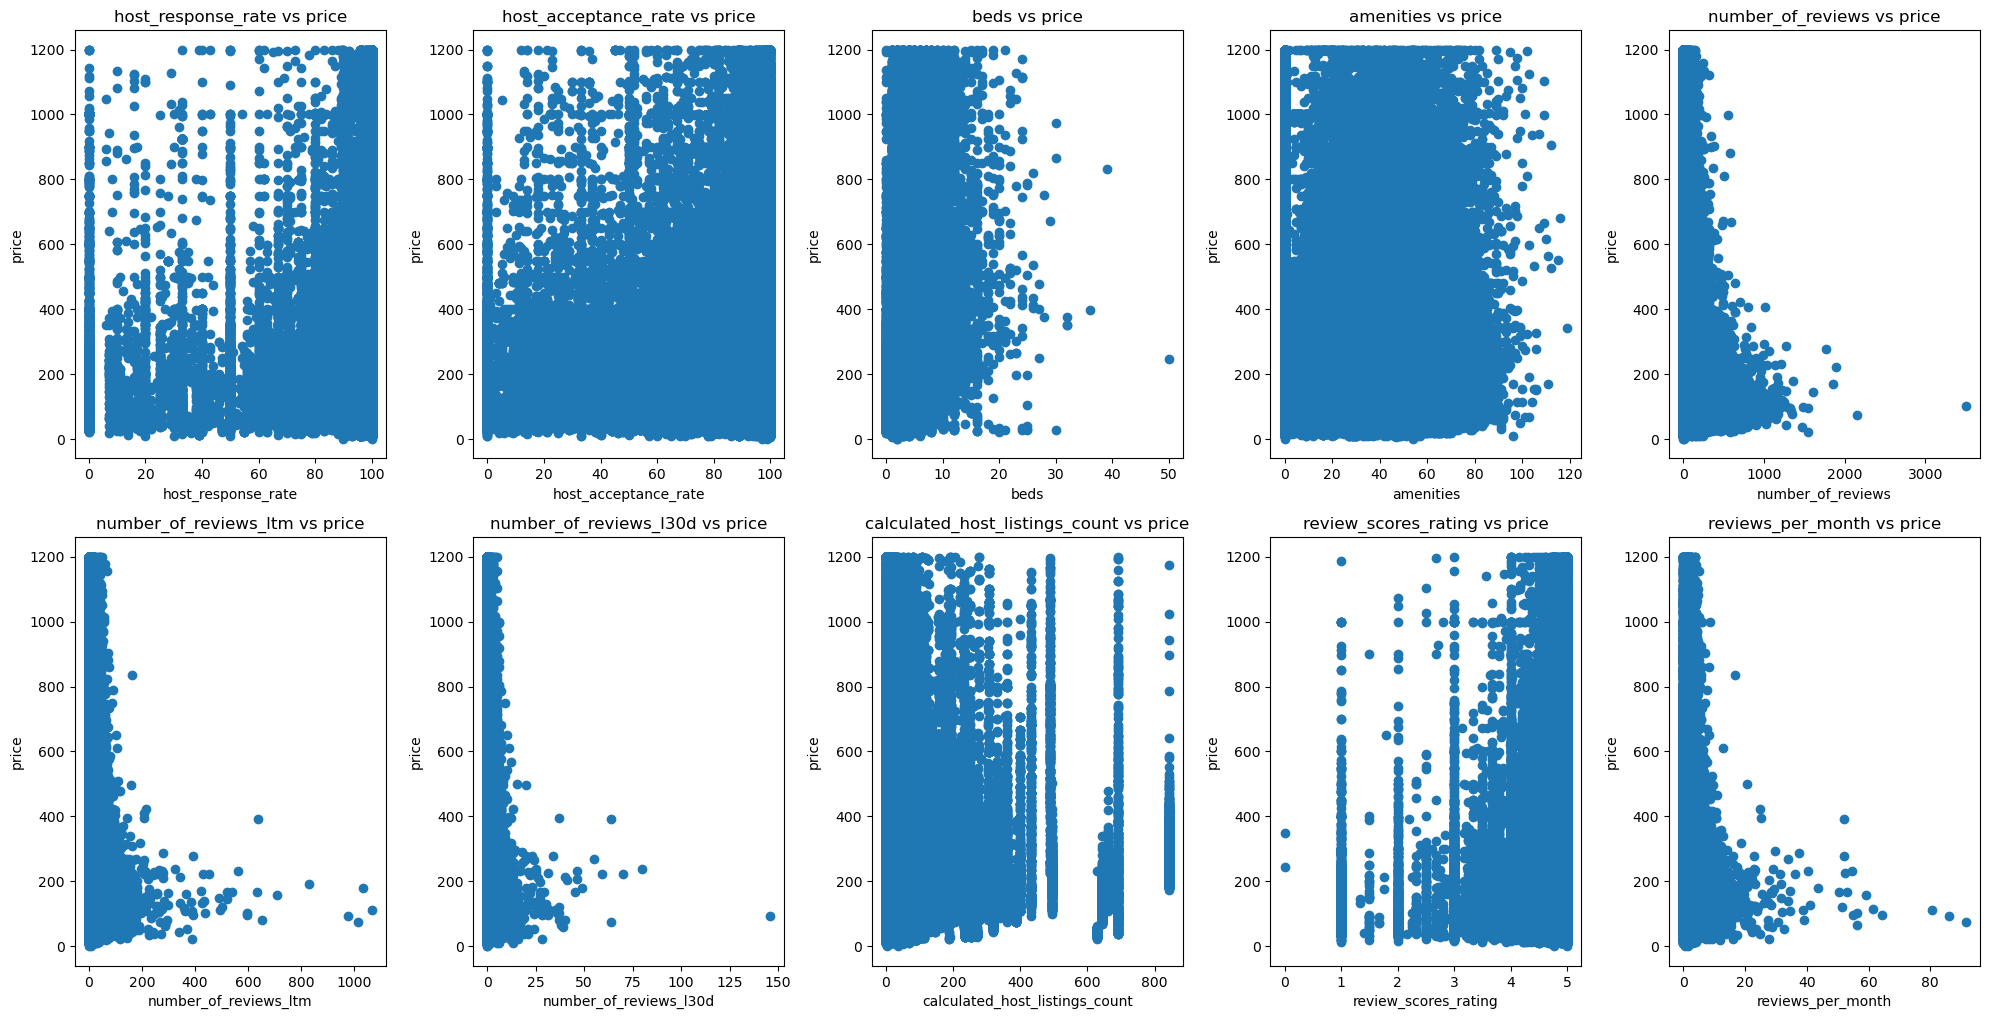

In [8]:
#Use scatter plot to compare price with numerical variables
plt.figure(figsize=(20, 20))   
for i in range(len(numerical)):
    plt.subplot(4, 5, i+1)
    plt.scatter(simple_imputed_df[numerical[i]], simple_imputed_df['price'])
    plt.xlabel(numerical[i])
    plt.ylabel('price')
    plt.title(f'{numerical[i]} vs price')
plt.tight_layout()
plt.show()


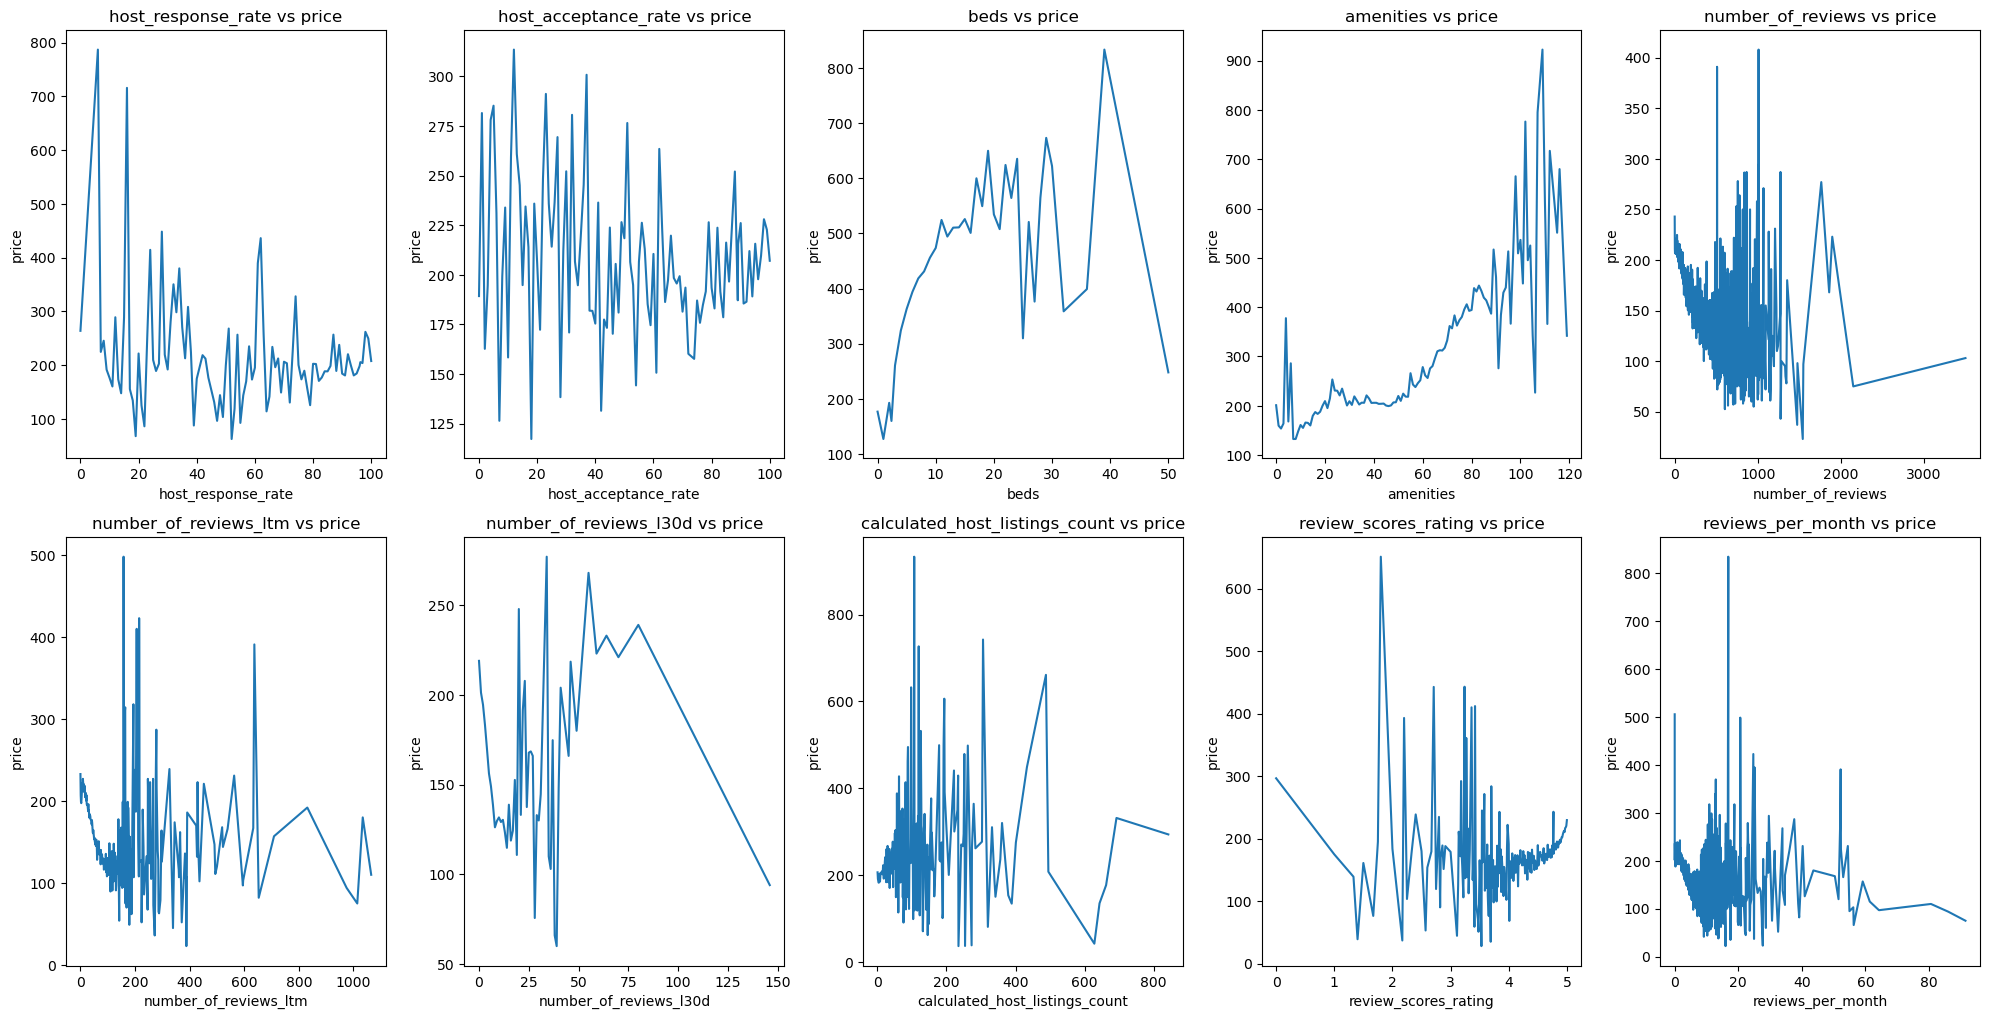

In [9]:
#Use line chart to compare average price with numerical variables
plt.figure(figsize=(20, 20))
for i in range(len(numerical)):
    plt.subplot(4, 5, i+1)
    simple_imputed_df.groupby(numerical[i])['price'].mean().plot()
    plt.xlabel(numerical[i])
    plt.ylabel('price')
    plt.title(f'{numerical[i]} vs price')
plt.tight_layout()
plt.show()


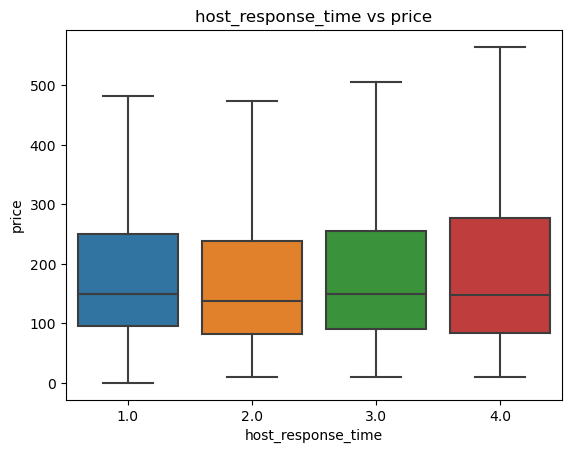

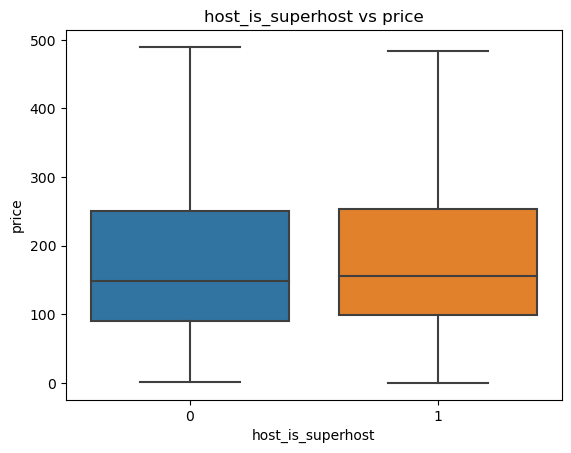

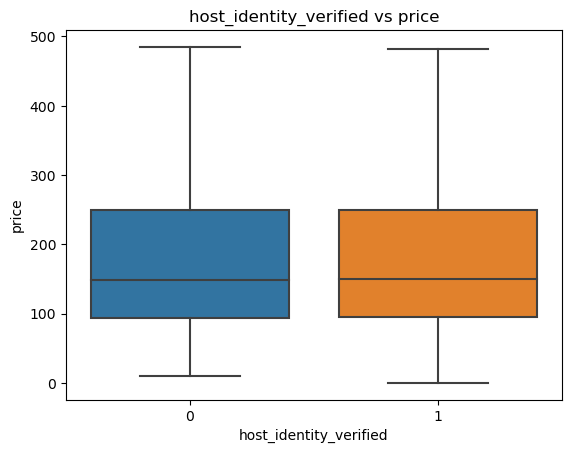

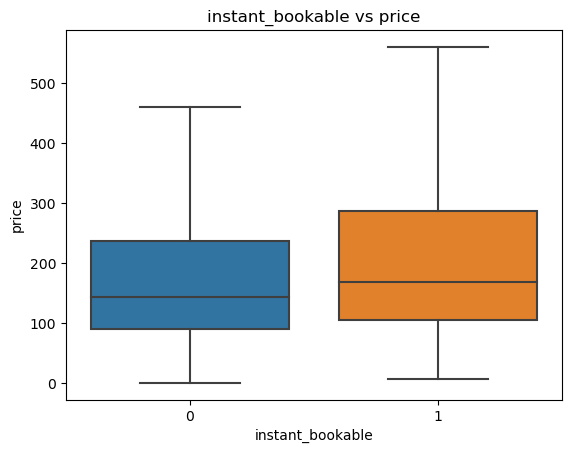

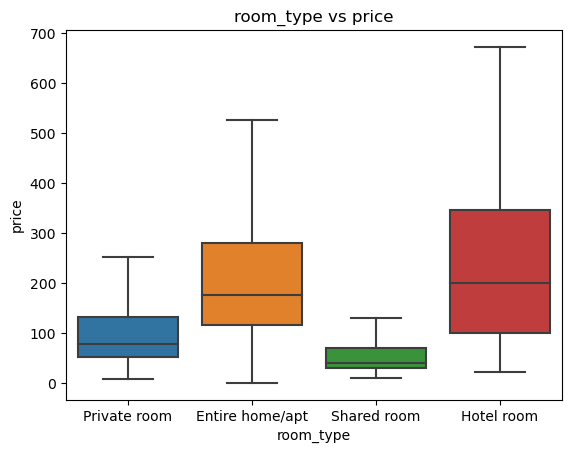

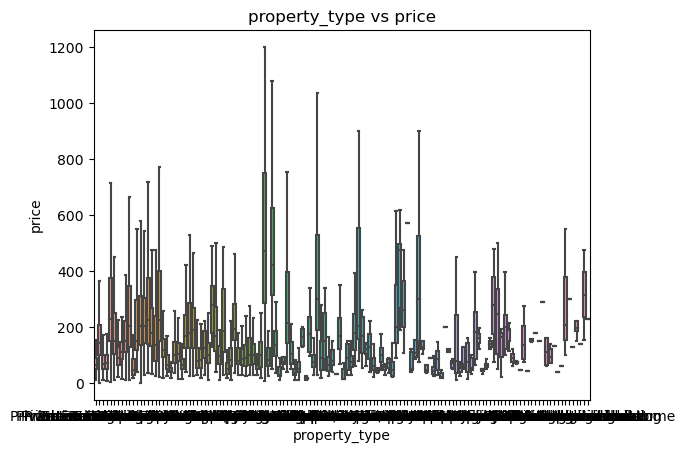

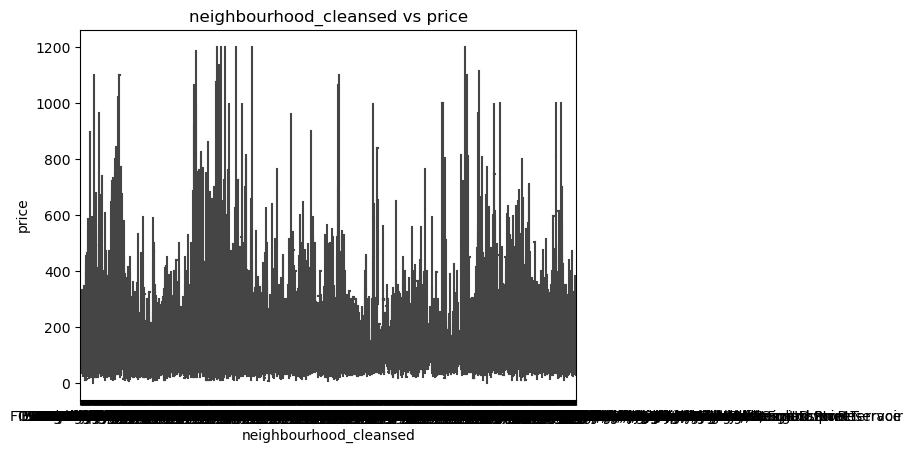

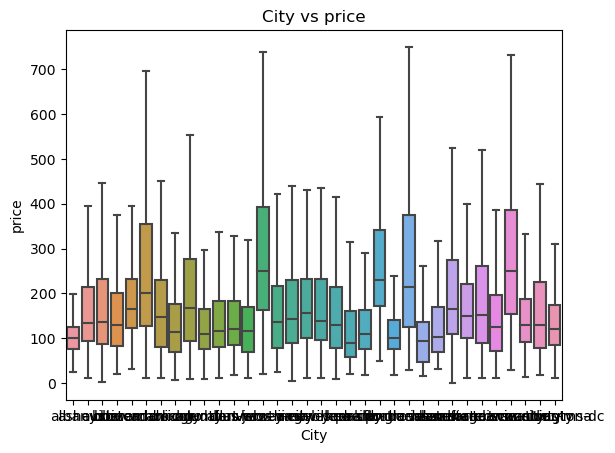

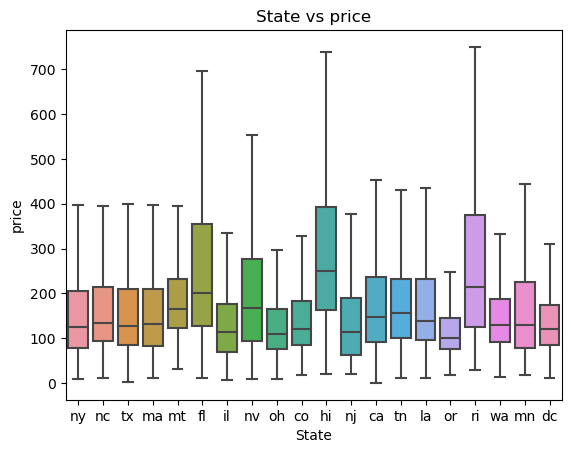

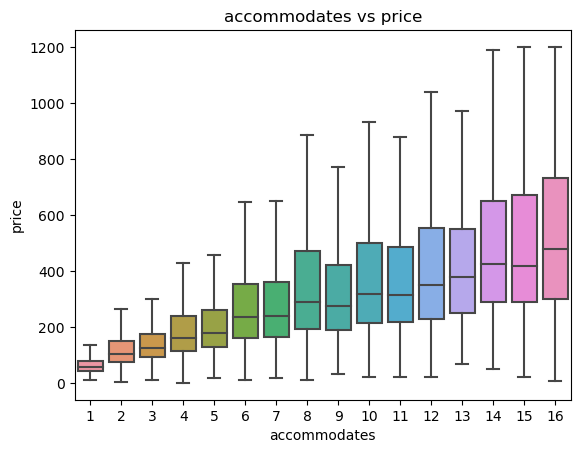

In [10]:
#Use box plot to compare price with categorical variables
for i in range(len(categorical)):
    sns.boxplot(x=categorical[i], y='price', data=simple_imputed_df, showfliers=False)
    plt.xlabel(categorical[i])
    plt.ylabel('price')
    plt.title(f'{categorical[i]} vs price')
    plt.show()


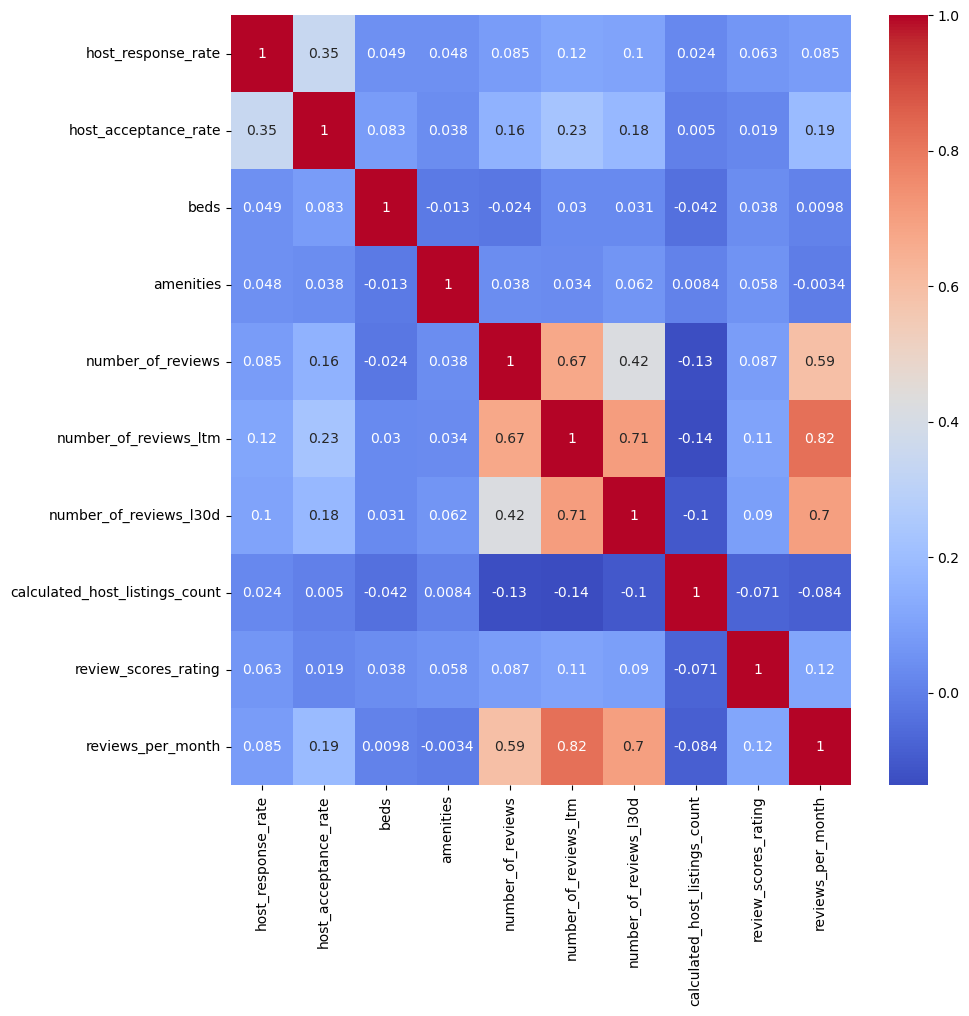

In [11]:
# Plot a heatmap of correlation matrix of numerical variables
plt.figure(figsize=(10, 10))
sns.heatmap(simple_imputed_df[numerical].corr(), annot=True, cmap='coolwarm')
plt.show()


ConversionError: Failed to convert value(s) to axis units: 0                   albany
18               asheville
53                  austin
87                  boston
91                 bozeman
107         broward-county
127              cambridge
155                chicago
216        clark-county-nv
245               columbus
259                 dallas
327                 denver
347             fort-worth
351                 hawaii
383            jersey-city
521            los-angeles
659              nashville
746            new-orleans
838          new-york-city
979                 newark
1032               oakland
1106         pacific-grove
1165              portland
1219          rhode-island
1240             rochester
1246              salem-or
1344             san-diego
1356         san-francisco
1400      san-mateo-county
1410    santa-clara-county
1424     santa-cruz-county
1462               seattle
1525       twin-cities-msa
1571         washington-dc
Name: City, dtype: object

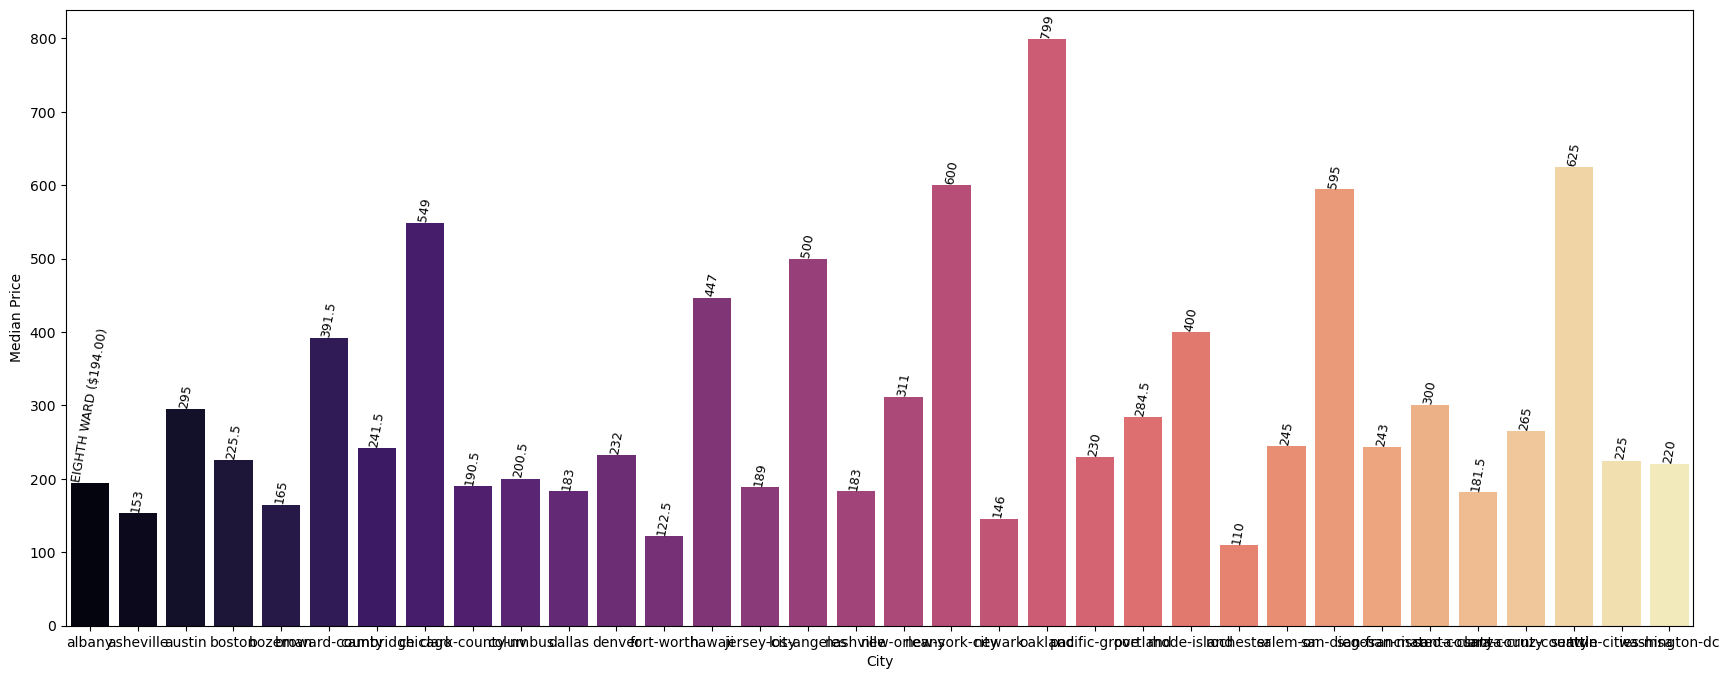

In [12]:
"""
Highest Price by City
"""

city_neighborhood_counts = simple_imputed_df.groupby(['City', 'neighbourhood_cleansed']).size().reset_index(name='count')

# Calculate the average price for each city and neighborhood combination
avg_prices = simple_imputed_df.groupby(['City', 'neighbourhood_cleansed'])['price'].median().reset_index()

# Merge the average prices with the top neighborhood counts
top_neighborhoods = city_neighborhood_counts.merge(avg_prices, on=['City', 'neighbourhood_cleansed'])

# Sort by city and average price (descending)
top_neighborhoods = top_neighborhoods.sort_values(['City', 'price'], ascending=[True, False]).groupby('City').head(1)

plt.figure(figsize=(21, 8))
bar_ax = sns.barplot(x="City", y="price", data=top_neighborhoods, palette="magma")

# Add neighborhood names and the median price
for i, bar in enumerate(bar_ax.containers):

    if top_neighborhoods.iloc[i]["price"] > 750:
      rotation = 0
    else:
      rotation = 80

    neighborhood = str(top_neighborhoods.iloc[i]['neighbourhood_cleansed']) + f" (${top_neighborhoods.iloc[i]['price']:.2f})"
    bar_ax.bar_label(bar, labels=[neighborhood], rotation=rotation, fontsize=9)


plt.xlabel("City")
plt.ylabel("Median Price")
plt.xticks(ticks=top_neighborhoods["City"], fontsize=12, rotation=60)
plt.title("Costliest Neighborhood in Each City")
plt.show()

In [ ]:
# 4. Investigating whether neighbourhood significantly impacts price
#Top 10 prices impacted by neighbourhood
import seaborn as sns

# Get the top 10 neighborhoods based on mean price
top_10_neighborhoods = neighborhood_impact.nlargest(10).index

# Filter the data to include only the top 10 neighborhoods
filtered_data = model_imputed_df[model_imputed_df['neighbourhood_cleansed'].isin(top_10_neighborhoods)]

# Define a function to remove outliers based on IQR
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers from the 'price' column
filtered_data = remove_outliers(filtered_data, 'price')

# Create a box plot
plt.figure(figsize=(14, 10))
sns.boxplot(x='neighbourhood_cleansed', y='price', data=filtered_data, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.title('Distribution of Prices Across Top 10 Neighborhoods (without outliers)')

# Show plot
plt.tight_layout()
plt.show()

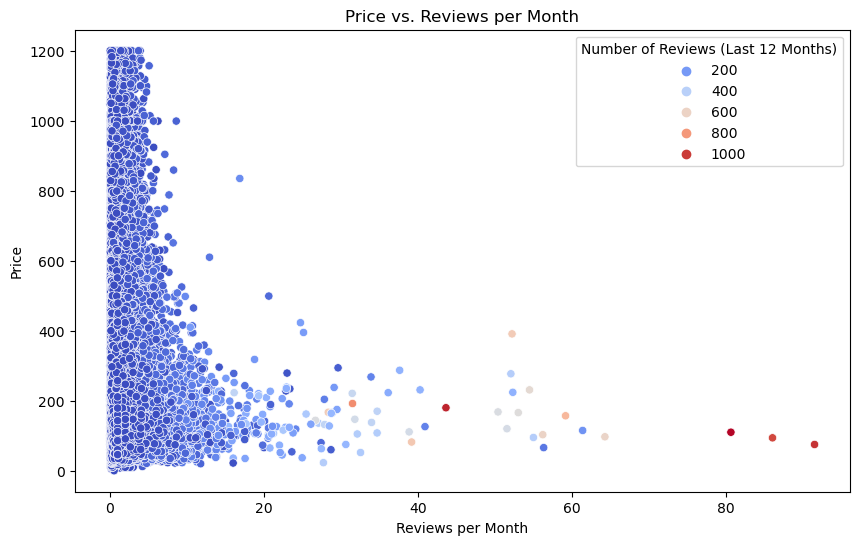

In [14]:
#Scatter plot of price vs. review per month and number of reviews
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for listings with reviews in the last 6 months
recent_reviews = simple_imputed_df[simple_imputed_df['number_of_reviews_ltm'] > 0]

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reviews_per_month', y='price', hue='number_of_reviews_ltm', data=recent_reviews, palette='coolwarm')
plt.title('Price vs. Reviews per Month')
plt.xlabel('Reviews per Month')
plt.ylabel('Price')
plt.legend(title='Number of Reviews (Last 12 Months)')
plt.show()